# Notebook to visualize VCR Data

First try

In [1]:
from pathlib import Path
import jsonlines as jsnl
import json
from tqdm import tqdm_notebook as tqdm

In [2]:
import matplotlib
matplotlib.use('agg')

In [3]:
%matplotlib inline

In [ ]:
import PIL

In [4]:
vcr_tdir = Path('../data/vcr1/')

In [5]:
vcr_imgs = vcr_tdir / 'vcr1images'

In [6]:
train_file = vcr_tdir / 'train.jsonl'

In [7]:
train_ann = jsnl.Reader(open(train_file))

In [8]:
t1 = []
for t in tqdm(train_ann.iter()):
#     print(t)
    t1.append(t)

In [ ]:
len(t1)

In [ ]:
ann1 = t1[0]

In [ ]:
ann1

In [ ]:
ann1.keys()

In [ ]:
ann1['objects']

In [ ]:
img = PIL.Image.open(vcr_imgs / ann1['img_fn'])

In [ ]:
img

In [ ]:
metd = json.load(open(str(vcr_imgs / ann1['metadata_fn'])))

In [ ]:
metd.keys()

In [ ]:
metd['names']

In [ ]:
metd['boxes'][3]

In [ ]:
poly1 = metd['segms'][-1][0]

In [ ]:
p1 = [tuple(x) for x in poly1]

In [ ]:
draw = PIL.ImageDraw.Draw(img, 'RGBA')

In [ ]:
draw.polygon(p1, fill=(255, 0, 0, 128), outline=(0, 0, 0, 128))

In [ ]:
img

### Import from File

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
from visualizer import Visualizer

In [84]:
vis = Visualizer(vcr_tdir, t1[7])

In [85]:
img, mask_img, odct = vis.get_img(), vis.get_mask_ann_img(), vis.get_QAR()

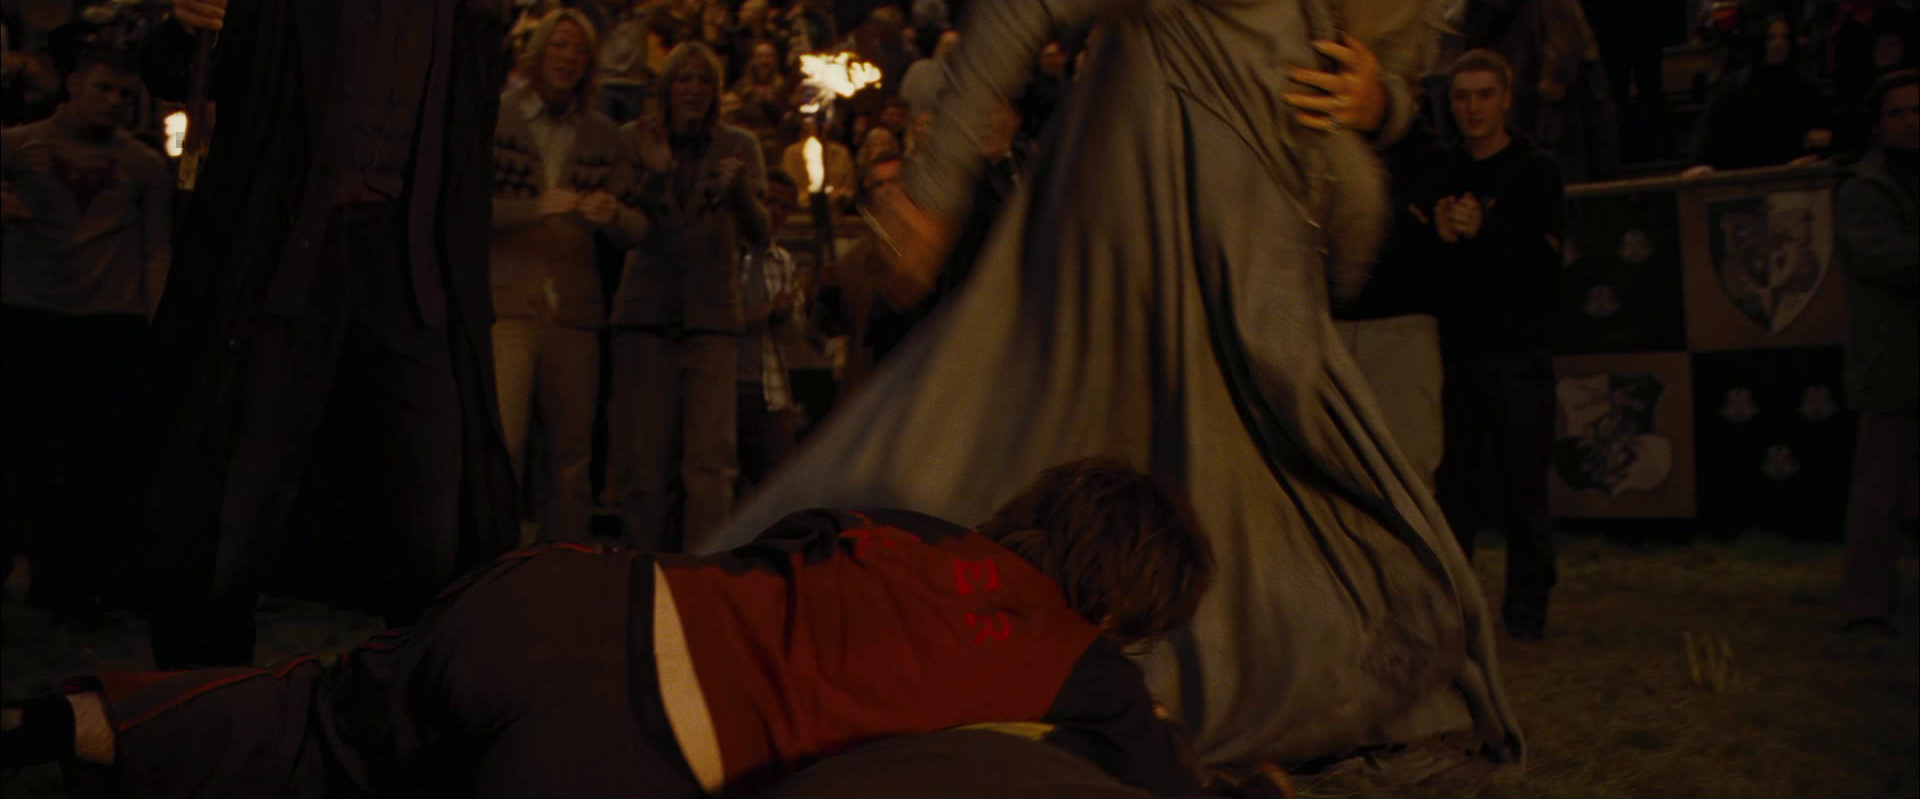

In [86]:
img

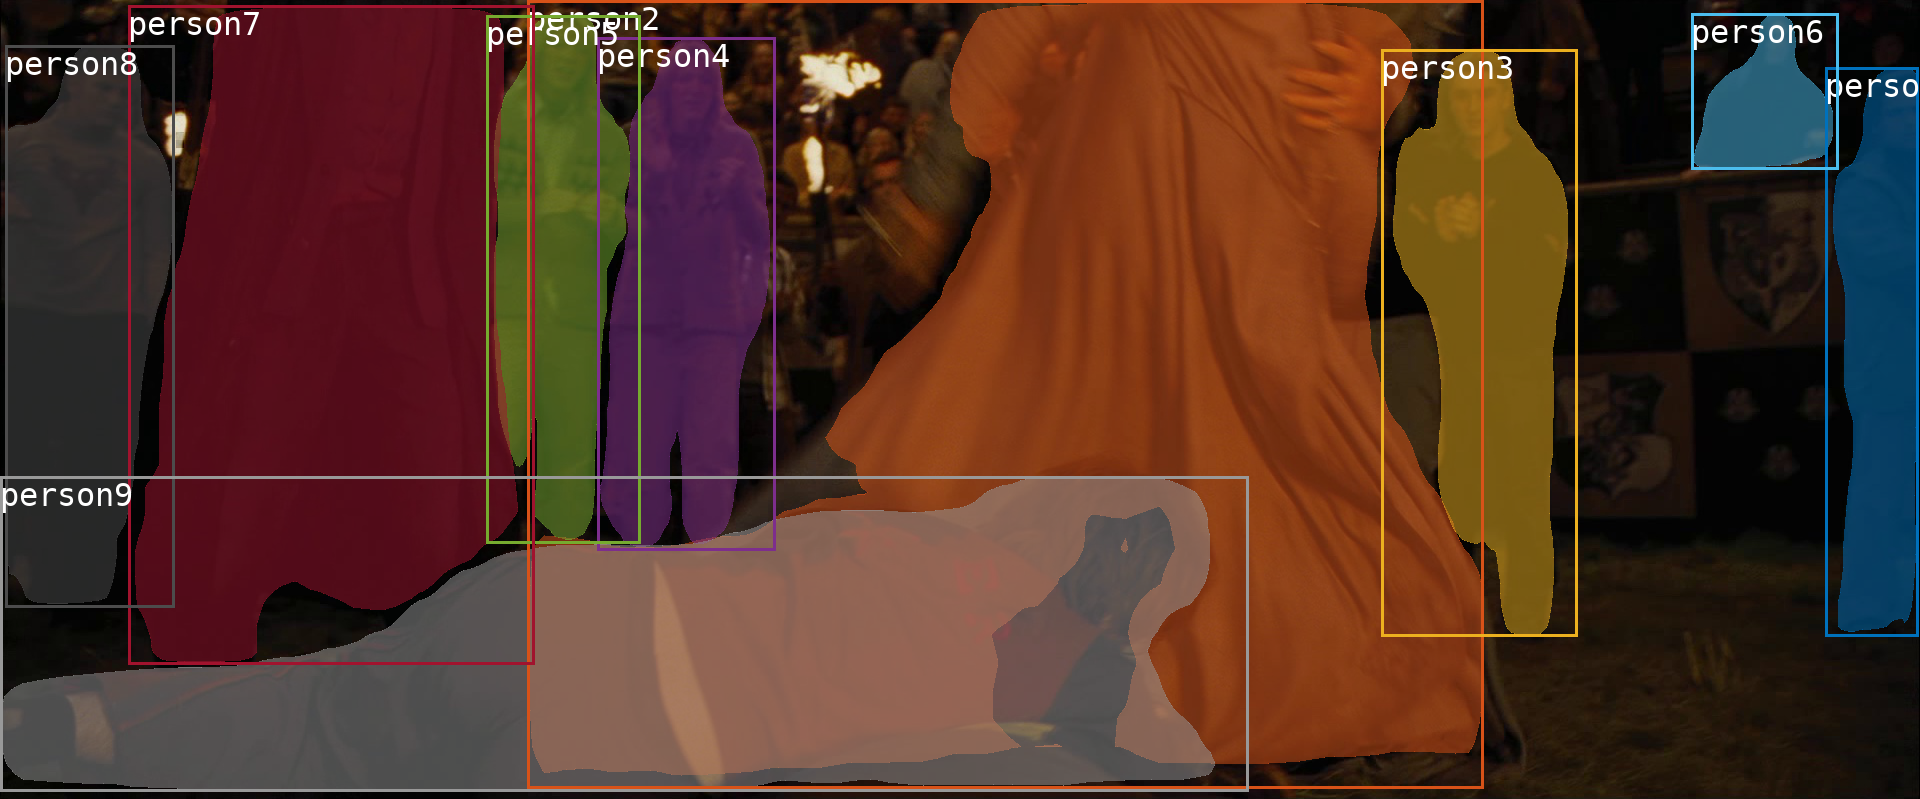

In [87]:
mask_img

In [88]:
odct

OrderedDict([('question', 'What is person4 doing ?'),
             ('answer_choices',
              ['person4 is buying something .',
               'Cheering on the fighters .',
               'person4 is leaving the room after talking with person5 .',
               'person9 is doing a ballroom dance with person4 .']),
             ('answer_label', 1),
             ('rationale_choices',
              ['person4 is sitting at a stadium watching a live game to cheer for her favorite team .',
               'person4 is yelling and waving her arms .',
               'She is looking at the field . her hand is covering her mouth .',
               'Her mouth is open and fists suggest an up and down rooting motion .']),
             ('rationale_label', 3)])

In [27]:
t1[1]['question']

['Do', [1, 2], 'work', 'together', '?']